

---


#  🟢 **Disciplina CAT010** - Aplicações dos Satélites em Ciências Atmosféricas


---






## **Aula Prática 1:** $\underline{Plotando\ Imagem\ de\ Satélite}$
---
**OBJETIVO:** Nesta aula prática aprenderemos como plotar as imagens do canal **visível**, **vapor d'água** e também do **infravermelho**. Para isto utilizaremos os dados do sensor [Advanced Baseline Imager (ABI)](https://space.oscar.wmo.int/instruments/view/abi) do satélite [Geostationary Operational Environmental Satellite (GOES-16)](https://space.oscar.wmo.int/satellites/view/goes_16).

---


**DADOS DE ENTRADA**: Serão utilizados os dados da NOAA disponibilizados no repositório da [Amazon](https://noaa-goes16.s3.amazonaws.com/index.html#ABI-L2-CMIPF/) e [CPTEC/INPE](http://ftp.cptec.inpe.br/goes/goes16/retangular)



Exemplo dos dados do CPTEC/INPE:

1. $\underline{Visível}$: CH02 - 0.64 µm
- **Tipo do dado:** matriz de 6262 linhas x 6262 colunas  
- **Formato do dado:** arquivo NETCDF
- **Nome do arquivo:** S10635334_202001231200.nc
- **Fonte dos dados:** FTP do [CPTEC/INPE](http://ftp.cptec.inpe.br/goes/goes16/retangular/ch02/)

    ----------

2. $\underline{Vapor\ d'água}$: CH08 - 6.15 µm
- **Tipo do dado:** matriz de 3131 linhas x 3131 colunas  
- **Formato do dado:** arquivo NETCDF
- **Nome do arquivo:** S10635340_202001231200.nc
- **Fonte dos dados:** FTP do [CPTEC/INPE](http://ftp.cptec.inpe.br/goes/goes16/retangular/ch08/)

    ----------

3. $\underline{Infravermelho}$: CH13 - 10.35 µm
- **Tipo do dado:** matriz de 3131 linhas x 3131 colunas  
- **Formato do dado:** arquivo NETCDF
- **Nome do arquivo:** S10635346_202001231200.nc
- **Fonte dos dados:** FTP do [CPTEC/INPE](http://ftp.cptec.inpe.br/goes/goes16/retangular/ch13/)

---

**DADOS DE SAÍDA:** Figuras de temperatura de brilho e reflectância.
- **Tipo do dado:** Figuras
- **Formato do dado:** arquivos JPG
- **Imagens geradas:**
    1. parte_1_2024-04-30_18:00_UTC.jpg
    2. parte_2_2024-04-30_18:00_UTC.jpg
    3. parte_3_2024-04-30_18:00_UTC.jpg
    4. parte_4_2024-04-30_18:00_UTC.jpg
    5. parte_5a_2024-04-30_18:00.jpg
    6. parte_5b_2024-04-30_18:00.jpg
    7. parte_5c_2024-04-30_18:00.jpg
    8. parte_6_2024-04-30_18:00.jpg
    9. parte_7_2024-04-30_13:00.jpg
    10. parte_7_animacao_imagens.gif
    11. parte_8_painel.jpg

---

**PROCEDIMENTO REALIZADO:** Os seguintes procedimentos são realizados nesse código:
1.   **1° Passo:** Preparando o Ambiente para os `scripts 1 ao 4`
2.   **PARTE 1** - Projeção Satélite em Níveis de Cinza
3.   **PARTE 2** - Projeção Satélite Realçada
4.   **PARTE 3** - Projeção Retangular em Níveis de Cinza
5.   **PARTE 4** - Projeção Retangular Realçada
6.   **2° Passo:** Preparando o Ambiente para os `Scripts 5 ao 8`
7.   **PARTE 5** - Plotando os canais VIS, IR, WV com os dados do INPE - *Individuais*
8.   **PARTE 6** - Plotando o canal IR + VIS + WV com os dados do INPE na forma de *Painel*
9.   **PARTE 7** - Plotando várias imagens do IR e criando animação
10.  **PARTE 8** - Plotando painel de imagens do IR


---
**OBSERVAÇÕES IMPORTANTES**:
1. Mudar o caminho para o do seu Google Drive no 1° Passo.

---
- **Realizado por:** Diego Souza/INPE e Enrique V. Mattos - 19/08/2024
- **Atualizado por:** Enrique V. Mattos - 24/08/2025


---

# **1° Passo:** Preparando o Ambiente para os `scripts 1 ao 4`

## **a) Instalando as Bibliotecas Necessárias**


Neste passo instalaremos as bibliotecas necessárias (e suas dependências) para a execução dos scripts. Basicamente, as bibliotecas terão a seguinte finalidade:

*   **Netcdf4:** Ler os dados de arquivos no formato NetCDF
*   **Cartopy:** Adicionar mapas aos plots
*   **Boto3:** Download de dados GOES-16 diretamente da nuvem da Amazon Web Services (AWS)


In [ ]:
# verificando as bibliotecas instaladas no Colab
!pip list

Package                               Version
------------------------------------- ------------------
absl-py                               1.4.0
absolufy-imports                      0.3.1
accelerate                            1.10.1
aiofiles                              24.1.0
aiohappyeyeballs                      2.6.1
aiohttp                               3.12.15
aiosignal                             1.4.0
alabaster                             1.0.0
albucore                              0.0.24
albumentations                        2.0.8
ale-py                                0.11.2
alembic                               1.16.5
altair                                5.5.0
annotated-types                       0.7.0
antlr4-python3-runtime                4.9.3
anyio                                 4.10.0
anywidget                             0.9.18
argon2-cffi                           25.1.0
argon2-cffi-bindings                  25.1.0
array_record                          0.8.1
arrow 

In [ ]:
# verificando se o gdal esta instalado no Colab
!pip show gdal

Name: GDAL
Version: 3.8.4
Summary: GDAL: Geospatial Data Abstraction Library
Home-page: http://www.gdal.org
Author: Frank Warmerdam
Author-email: warmerdam@pobox.com
License: MIT
Location: /usr/local/lib/python3.12/dist-packages
Requires: 
Required-by: 


In [ ]:
# verificando se o cartopy esta instalado no Colab
!pip show netcdf4

In [ ]:
# verificando se o cartopy esta instalado no Colab
!pip show cartopy

In [ ]:
# verificando se o cartopy esta instalado no Colab
!pip show boto3

In [ ]:
!pip install -q netcdf4 cartopy boto3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 43.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 24.1 MB/s eta 0:00:00


In [ ]:
# verificando se o cartopy esta instalado no Colab
!pip show netcdf4

Name: netCDF4
Version: 1.7.2
Summary: Provides an object-oriented python interface to the netCDF version 4 library
Home-page: 
Author: 
Author-email: Jeff Whitaker <jeffrey.s.whitaker@noaa.gov>
License: MIT
Location: /usr/local/lib/python3.12/dist-packages
Requires: certifi, cftime, numpy
Required-by: 


## **b) Download de Arquivos Auxiliares**

Neste passo vamos baixar alguns arquivos auxiliares necessários para parte dos scripts que serão demonstrados nesta aula prática. Os arquivos estão disponíveis no [GitHub](https://github.com/evmpython/CAT010_UNIFEI_2025/tree/main/utils):

*   **utilities_goes16.py:** Script com algumas funções para processamento de dados do satélite GOES-16
*   **ir.cpt:** Paleta de cores para o canal do infravermelhos do satélite GOES-16

In [ ]:
# importa biblioteca que contabiliza o tempo de processamento
import time

# Download do arquivo "utilities.py"
!wget -c https://github.com/evmpython/CAT010_UNIFEI_2025/raw/main/utils/utilities_goes16.py

# Download da paleta de cores para o canal do infravermelho
!wget -c https://github.com/evmpython/CAT010_UNIFEI_2025/raw/main/utils/ir.cpt

--2025-09-07 23:19:02--  https://github.com/evmpython/CAT010_UNIFEI_2025/raw/main/utils/utilities_goes16.py
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/evmpython/CAT010_UNIFEI_2025/main/utils/utilities_goes16.py [following]
--2025-09-07 23:19:02--  https://raw.githubusercontent.com/evmpython/CAT010_UNIFEI_2025/main/utils/utilities_goes16.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17330 (17K) [text/plain]
Saving to: ‘utilities_goes16.py’

utilities_goes16.py 100%[===================>]  16.92K  --.-KB/s    in 0.001s  

2025-09-07 23:19:02 (26.8 MB/s) - ‘utilities_goes16.py’ saved [1733

## **c) Montando Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **d) Caminho do diretório** - ### >>> MUDANÇAS AQUI <<< ###

- Insira aqui o caminho da pasta do seu Google Drive onde esta o código dessa aula: `alterar aqui`

In [ ]:
dir = '/content/drive/MyDrive/00_DISPONIBILIZAÇÃO_DE_AULAS/2_SEGUNDO_SEMESTRE/CAT010 - APLICAÇÕES DOS SATÉLITES EM CIÊNCIAS ATMOSFÉRICAS/AULAS/CAT010 - PYTHON PARA SATÉLITES METEOROLÓGICOS/AULA_01_PLOTA_IMAGENS_SATELITE'

- Criando a pasta de saída ("output")

In [ ]:
import os
os.makedirs(f'{dir}/output/', exist_ok=True)

#**PARTE 1)**: Projeção Satélite em Níveis de Cinza



Neste primeiro script vamos acessar e processar um arquivo NetCDF do sensor ABI do satélite GOES-16 e visualizar a imagem na projeção original (conhecida como projeção "GOES-R" ou "satélite"). Temos basicamente 5 "blocos" de código:

**1. Importação das bibliotecas necessárias**

**2. Criação de diretórios de entrada e saída de dados**

**3. Download de dados do sensor ABI do GOES-16**

**4. Leitura do aquivo NetCDF do sensor ABI**

**5. Criação da figura**

O que podemos modificar facilmente?

**1. Data e hora do arquivo a ser baixado**

**2. Qual canal ABI desejamos baixar**

**3. Escala de cores ([colormaps](https://matplotlib.org/stable/users/explain/colors/colormaps.html) padrão da matplotlib), título, entre outras decorações da imagem**

In [ ]:
%%time
#========================================================================================================================#
#                                          IMPORTAÇÃO DAS BIBLIOTECAS
#========================================================================================================================#
import xarray as xr
import matplotlib.pyplot as plt
import cartopy, cartopy.crs as ccrs
from datetime import datetime
from utilities_goes16 import download_CMI
import os
import warnings
warnings.filterwarnings("ignore")

#========================================================================================================================#
#                                        CRIA DIRETÓRIO DE ENTRADA E SAÍDA
#========================================================================================================================#
input = "/content/input"; os.makedirs(input, exist_ok=True)
output = f"{dir}/output"

#========================================================================================================================#
#                                               DOWNLOAD DO ARQUIVO
#========================================================================================================================#
# data de processamento: 2024-04-30 às 18:00 UTC
yyyymmddhhmn = '202404301800'

# canal do ABI
band = '13'

# download do arquivo (CMI: "Cloud and Moisture Imagery" Product)
file_name = download_CMI(yyyymmddhhmn, band, input)

# caminho do arquivo que foi baixado
path = f'{input}/{file_name}.nc'

#========================================================================================================================#
#                                               LEITURA DO ARQUIVO
#========================================================================================================================#
# abre a imagem
data = xr.open_dataset(path)

#========================================================================================================================#
#                                                 PLOTA A IMAGEM
#========================================================================================================================#
# tamanho da figura (largura x altura em polegadas)
plt.figure(figsize=(10,10))

# usa a projeção geoestacionária do cartopy
# para o GOES-16: longitude central: -75.0 / altura do satellite: 35786023.0
# a extensão do Full Disk: (metade dos pixels full disk) X (tamanho do pixel em radianos) X (altura do satélite em metros) => 2712 * 0.000056 * 35786023.0 = 5434894.67527
ax = plt.axes(projection=ccrs.Geostationary(central_longitude=-75.0, satellite_height=35786023.0))
img_extent = (-5434894.67527, 5434894.67527, -5434894.67527, 5434894.67527)

# linhas costeiras, bordas e linhas de grade do mapa
ax.coastlines(resolution='10m', color='white', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=0.5)
ax.gridlines(color='white', alpha=0.5, linestyle='--', linewidth=0.5)

# escala de cores
colormap = "gray_r" # escala de cores na ordem reversa - branco para preto para o canal do IR

# plota imagem
img = ax.imshow(data['CMI'] - 273.15, origin='upper', vmin=-80, vmax=40,
                extent=img_extent, cmap=colormap)

# barra de cores
plt.colorbar(img, label='Temperatura de Brilho (°C)', extend='both', orientation='vertical', pad=0.05, fraction=0.05)

# leitura da data/horário do arquivo NetCDF como uma string
date = (datetime.strptime(data.time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ')).strftime('%Y-%m-%d %H:%M UTC')

# título da figura
plt.title(f'GOES-16 Banda 13 (10.35 µm)\n{date}', fontweight='bold', fontsize=10, loc='left')
plt.title('Full Disk', fontsize=10, loc='right')

# salva figura
plt.savefig(f'{output}/parte_1_{date.replace(" ", "_")}.jpg', bbox_inches='tight', dpi=300)

# mostra figura na tela
plt.show()

In [ ]:
# mostrando o dado do satélite
data

#**PARTE 2)**: Projeção Satélite Realçada

Agora iremos plotar a imagem do GOES-16 na projeção satélite com as cores coloridas, também conhecida como imagem T-Realçada.

In [ ]:
%%time
#========================================================================================================================#
#                                          IMPORTAÇÃO DAS BIBLIOTECAS
#========================================================================================================================#
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import cm
import cartopy, cartopy.crs as ccrs
from datetime import datetime
from utilities_goes16 import download_CMI, remap, loadCPT
import os

#========================================================================================================================#
#                                          CRIA DIRETÓRIO DE ENTRADA
#========================================================================================================================#
input = "/content/input"; os.makedirs(input, exist_ok=True)
output = f"{dir}/output"

#========================================================================================================================#
#                                               DOWNLOAD DO ARQUIVO
#========================================================================================================================#
# data de processamento: 2024-04-30 às 18:00 UTC
yyyymmddhhmn = '202404301800'

# canal do ABI
band = '13'

# download do arquivo (CMI: "Cloud and Moisture Imagery" Product)
file_name = download_CMI(yyyymmddhhmn, band, input)

# caminho do arquivo que foi baixado
path = f'{input}/{file_name}.nc'

#========================================================================================================================#
#                                               LEITURA DO ARQUIVO
#========================================================================================================================#
# abre a imagem
data = xr.open_dataset(path)

#========================================================================================================================#
#                                                 PLOTA A IMAGEM
#========================================================================================================================#
# tamanho da figura (largura x altura em polegadas)
plt.figure(figsize=(10,10))

# usa a projeção geoestacionária do cartopy
# para o GOES-16: longitude central: -75.0 / altura do satellite: 35786023.0
# a extensão do Full Disk: (metade dos pixels full disk) X (tamanho do pixel em radianos) X (altura do satélite em metros) => 2712 * 0.000056 * 35786023.0 = 5434894.67527
ax = plt.axes(projection=ccrs.Geostationary(central_longitude=-75.0, satellite_height=35786023.0))
img_extent = (-5434894.67527, 5434894.67527, -5434894.67527, 5434894.67527)

# linhas costeiras, bordas e linhas de grade do mapa
ax.coastlines(resolution='10m', color='white', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=0.5)
ax.gridlines(color='white', alpha=0.5, linestyle='--', linewidth=0.5)

# converte o arquivo CPT para ser usado em Python
cpt = loadCPT('ir.cpt')
colormap = cm.colors.LinearSegmentedColormap('cpt', cpt)

# plota imagem
img = ax.imshow(data['CMI'] - 273.15, origin='upper', vmin=-103.0, vmax=84, extent=img_extent, cmap=colormap)

# barra de cores
plt.colorbar(img, label='Temperatura de Brilho (°C)', extend='both', orientation='vertical', pad=0.05, fraction=0.05)

# leitura da data/horário do arquivo NetCDF como uma string
date = (datetime.strptime(data.time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ')).strftime('%Y-%m-%d %H:%M UTC')

# título da figura
plt.title(f'GOES-16 Banda 13 (10.35 µm)\n{date}', fontweight='bold', fontsize=10, loc='left')
plt.title('Full Disk', fontsize=10, loc='right')

# salva figura
# salva figura
plt.savefig(f'{output}/parte_2_{date.replace(" ", "_")}.jpg', bbox_inches='tight', dpi=300)

# mostra figura na tela
plt.show()

#**PARTE 3)**: Projeção Retangular em Níveis de Cinza


Neste segundo script vamos reprojetar a imagem ABI, da projeção satélite (ou GOES-R) para a projeção "cilíndrica equidistante" utilizando uma função chamada "remap", que utiliza a biblioteca [GDAL](https://gdal.org/en/stable/). O dado reprojetado será visualizado em escala de cinza invertida (branco para temperaturas de brilho mais baixas e preto para temperaturas de brilho mais altas).

O que podemos modificar facilmente?

**1. A região desejada (variável "extent")**

In [ ]:
%%time
#========================================================================================================================#
#                                          IMPORTAÇÃO DAS BIBLIOTECAS
#========================================================================================================================#
import xarray as xr
import matplotlib.pyplot as plt
import cartopy, cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from datetime import datetime
from utilities_goes16 import download_CMI, remap
import numpy as np
import os

#========================================================================================================================#
#                                        CRIA DIRETÓRIO DE ENTRADA E SAÍDA
#========================================================================================================================#
input = "/content/input"; os.makedirs(input, exist_ok=True)
output = f"{dir}/output"

#========================================================================================================================#
#                                               DOWNLOAD DO ARQUIVO
#========================================================================================================================#
# data de processamento
yyyymmddhhmn = '202404301800'

# canal do ABI
band = '13'

# download do arquivo (CMI: "Cloud and Moisture Imagery" Product)
file_name = download_CMI(yyyymmddhhmn, band, input)

# caminho do arquivo que foi baixado
path = f'{input}/{file_name}.nc'

#========================================================================================================================#
#                                         REPROJETA E FAZ A LEITURA DO ARQUIVO
#========================================================================================================================#
# área desejada (min lon, min lat, max lon, max lat)
extent = [-60.00, -40.00, -35.00, -25.00]

# chama a função que faz a reprojeção (file, variable, extent, resolution)
grid = remap(path, 'CMI', extent, 2)

# leitura do dado e transforma para °C
data = grid.ReadAsArray() - 273.15

#========================================================================================================================#
#                                                 PLOT THE IMAGE
#========================================================================================================================#
# tamanho da figura (largura x altura em polegadas)
plt.figure(figsize=(10,10))

# projeção geoestacionária do cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

# define a extensão da imagem
img_extent = [extent[0], extent[2], extent[1], extent[3]] # Min lon, Max lon, Min lat, Max lat

# escala de cores
colormap = "gray_r" # escala de cores na ordem reversa - branco para preto para o canal do IR

# plota imagem
img = ax.imshow(data, origin='upper', vmin=-80, vmax=40, extent=img_extent, cmap=colormap)

# linhas costeiras, bordas e linhas de grade do mapa
ax.coastlines(resolution='10m', color='white', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# plota estados
shapefile = list(shpreader.Reader('https://github.com/evmpython/CAT010_UNIFEI_2024/raw/main/shapefiles/BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='white', facecolor='none', linewidth=1.0)

# barra de cores
plt.colorbar(img, label='Temperatura de Brilho (°C)', extend='both', orientation='horizontal', pad=0.05, fraction=0.05)

# leitura da data/horário do arquivo NetCDF como uma string
date = (datetime.strptime(xr.open_dataset(path).time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ')).strftime('%Y-%m-%d %H:%M UTC')

# título da figura
plt.title(f'GOES-16 Banda 13 (10.35 µm)\n{date}', fontweight='bold', fontsize=10, loc='left')
plt.title('Reg.: ' + str(extent) , fontsize=10, loc='right')

# salva figura
plt.savefig(f'{output}/parte_3_{date.replace(" ", "_")}.jpg', bbox_inches='tight', dpi=300)

# mostra figura na tela
plt.show()

In [ ]:
# dados reprojetados
grid

In [ ]:
# mostra a matriz de dados de temperatura reprojetados
data

#**PARTE 4)**: Projeção Retangular Realçada

Nesta terceira parte vamos reprojetar a imagem e visualizá-la em escala colorida, realçando a imagem IR. Para isso, vamos utilizar a função **"loadCPT"**, criada para carregar uma paleta de cores no formato de arquivo ".cpt". Podemos acessar dezenas de escalas neste formato na seguinte página: http://seaviewsensing.com/pub/cpt-city/

In [ ]:
%%time
#========================================================================================================================#
#                                          IMPORTAÇÃO DAS BIBLIOTECAS
#========================================================================================================================#
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import cm
import cartopy, cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
from datetime import datetime
from utilities_goes16 import download_CMI, remap, loadCPT
import numpy as np
import os

#========================================================================================================================#
#                                        CRIA DIRETÓRIO DE ENTRADA E SAÍDA
#========================================================================================================================#
input = "/content/input"; os.makedirs(input, exist_ok=True)
output = f"{dir}/output"

#========================================================================================================================#
#                                               DOWNLOAD DO ARQUIVO
#========================================================================================================================#
# data de processamento
yyyymmddhhmn = '202404301800'

# canal do ABI
band = '13'

# download do arquivo (CMI: "Cloud and Moisture Imagery" Product)
file_name = download_CMI(yyyymmddhhmn, band, input)

# caminho do arquivo que foi baixado
path = f'{input}/{file_name}.nc'

#========================================================================================================================#
#                                         REPROJETA E FAZ A LEITURA DO ARQUIVO
#========================================================================================================================#
# área desejada (min lon, min lat, max lon, max lat)
extent = [-60.00, -40.00, -35.00, -25.00]

# chama a função que faz a reprojeção (file, variable, extent, resolution)
grid = remap(path, 'CMI', extent, 2)

# leitura do dado e transforma para °C
data = grid.ReadAsArray() - 273.15

#========================================================================================================================#
#                                                 PLOT THE IMAGE
#========================================================================================================================#
# tamanho da figura (largura x altura em polegadas)
plt.figure(figsize=(10,10))

# projeção geoestacionária do cartopy
ax = plt.axes(projection=ccrs.PlateCarree())

# define a extensão da imagem
img_extent = [extent[0], extent[2], extent[1], extent[3]] # Min lon, Max lon, Min lat, Max lat

# converte o arquivo CPT para ser usado em Python
cpt = loadCPT('ir.cpt')
colormap = cm.colors.LinearSegmentedColormap('cpt', cpt)

# plota imagem
img = ax.imshow(data, origin='upper', vmin=-103.0, vmax=84, extent=img_extent, cmap=colormap)

# linhas costeiras, bordas e linhas de grade do mapa
ax.coastlines(resolution='10m', color='white', linewidth=0.8)
ax.add_feature(cartopy.feature.BORDERS, edgecolor='white', linewidth=0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), color='gray', alpha=1.0, linestyle='--', linewidth=0.25, xlocs=np.arange(-180, 180, 5), ylocs=np.arange(-90, 90, 5), draw_labels=True)
gl.top_labels = False
gl.right_labels = False

# plota estados
shapefile = list(shpreader.Reader('https://github.com/evmpython/CAT010_UNIFEI_2024/raw/main/shapefiles/BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='white', facecolor='none', linewidth=1.0)

# barra de cores
plt.colorbar(img, label='Temperatura de Brilho (°C)', extend='both', orientation='horizontal', pad=0.05, fraction=0.05)

# leitura da data/horário do arquivo NetCDF como uma string
date = (datetime.strptime(xr.open_dataset(path).time_coverage_start, '%Y-%m-%dT%H:%M:%S.%fZ')).strftime('%Y-%m-%d %H:%M UTC')

# título da figura
plt.title(f'GOES-16 Banda 13 (10.35 µm)\n{date}', fontweight='bold', fontsize=10, loc='left')
plt.title('Reg.: ' + str(extent) , fontsize=10, loc='right')

# salva figura
plt.savefig(f'{output}/parte_4_{date.replace(" ", "_")}.jpg', bbox_inches='tight', dpi=300)

# mostra figura na tela
plt.show()

# **2° Passo:** Preparando o Ambiente para os `scripts 5 ao 8`



---


A ideia das partes 4 à 8 é usarmos os dados que já estão em projeção retangular fornecidos pelo CPTEC/INPE.

- Esses dados são fornecidos pela NOAA e reprocessados pela [Divisão de Satélites (DSA)](http://satelite.cptec.inpe.br/home/index.jsp) do CPTEC/INPE e estão disponíveis no [ftp](http://ftp.cptec.inpe.br/goes/goes16/retangular/) do INPE. Abaixo seguem informações sobres esses 3 canais:



---

1. [Visível](http://ftp.cptec.inpe.br/goes/goes16/retangular/ch02/): CH02 - 0.64 µm
2. [Vapor d'água](http://ftp.cptec.inpe.br/goes/goes16/retangular/ch08/): CH08 - 6.15 µm
3. [Infravermelho](http://ftp.cptec.inpe.br/goes/goes16/retangular/ch13/): CH13 - 10.35 µm

---

## a) Instalando as Bibliotecas Necessárias


Neste passo instalamos as bibliotecas necessárias (e suas dependências) para a execução dos scripts. Basicamente, as bibliotecas terão a seguinte finalidade:

*   **UltraPlot:** Biblioteca para plotar figuras de alta qualidade

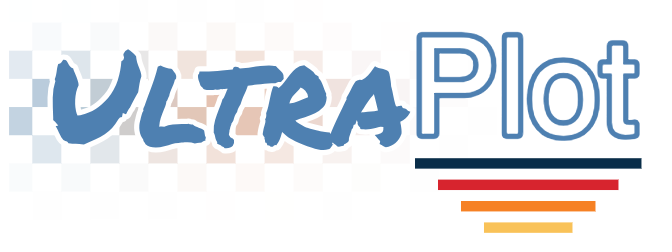

O [UltraPlot](https://github.com/Ultraplot/ultraplot) é uma biblioteca para produzir gráficos **bonitos** e de **alta qualidade** científica de **maneira fácil**. A grande vantagem do UltraPlot em relação ao Matplotlib para plotar gráficos é a sua sintaxe sucinta e a alta qualidade dos gráficos. Para maiores informações sobre o UltraPlot acesse:

- Pypi: https://pypi.org/project/ultraplot/

- GitHub: https://github.com/Ultraplot/

- Documentação: https://ultraplot.readthedocs.io/en/latest/

A instalação da biblioteca ultraplot e das suas dependências.

In [ ]:
# verificando se o proplot esta instalado no colab
!pip show ultraplot

In [ ]:
!pip install -q ultraplot cartopy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 68.2 MB/s eta 0:00:00


In [ ]:
# verificando a versão do ultraplot disponível no google colab
!pip show ultraplot

Name: ultraplot
Version: 1.60.2
Summary: A succinct matplotlib wrapper for making beautiful, publication-quality graphics.
Home-page: 
Author: 
Author-email: Casper van Elteren <caspervanelteren@gmail.com>, Luke Davis <lukelbd@gmail.com>
License: MIT
Location: /usr/local/lib/python3.12/dist-packages
Requires: matplotlib, numpy
Required-by: 


## b) Download de Arquivos Auxiliares

Neste passo vamos baixar alguns arquivos auxiliares necessários para a parte dos scripts que serão demonstrados no curso:

*   **utilities_goes16.py:** Script com algumas funções para processamento de dados de satélite
*   **ir.cpt:** Paleta de cores para canais infravermelhos do GOES-16
*   **vis.cpt:** Paleta de cores para o canal do visível do GOES-16
*   **wv.cpt:** Paleta de cores para o canal do vapor d'água do GOES-16

In [ ]:
# baixando o arquivo utilities.py
!wget -c https://github.com/evmpython/CAT010_UNIFEI_2025/raw/main/utils/utilities_goes16.py

# baixando a paletas de cores do infravermelho, visível e vapor d'água
!wget -c https://github.com/evmpython/CAT010_UNIFEI_2025/raw/main/utils/ir.cpt
!wget -c https://github.com/evmpython/CAT010_UNIFEI_2025/raw/main/utils/vis.cpt
!wget -c https://github.com/evmpython/CAT010_UNIFEI_2025/raw/main/utils/wv.cpt

--2025-09-07 23:19:41--  https://github.com/evmpython/CAT010_UNIFEI_2025/raw/main/utils/utilities_goes16.py
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/evmpython/CAT010_UNIFEI_2025/main/utils/utilities_goes16.py [following]
--2025-09-07 23:19:41--  https://raw.githubusercontent.com/evmpython/CAT010_UNIFEI_2025/main/utils/utilities_goes16.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

--2025-09-07 23:19:41--  https://github.com/evmpython/CAT010_UNIFEI_2025/raw/main/utils/ir.cpt
Resolving github.com (github.com)... 140.82

#**PARTE 5)**: Plotando os canais VIS, IR, WV com os dados do INPE - *Individuais*


- A ideia desse script é vocês baixarem os dados brutos de satélite direto da fonte. Assim, o primeiro passo será baixar os dados de satélite para os canais visível, infravermelho e vapor d'água para uma determinada data.
- Esses dados são fornecidos pela NOAA e reprocessados pela [Divisão de Satélites (DSA)](http://satelite.cptec.inpe.br/home/index.jsp) do CPTEC/INPE e estão disponíveis no [ftp](http://ftp.cptec.inpe.br/goes/goes16/retangular/) do INPE. Abaixo seguem informações sobres esses 3 canais:



---

1. [Visível](http://ftp.cptec.inpe.br/goes/goes16/retangular/ch02/): CH02 - 0.64 µm
2. [Vapor d'água](http://ftp.cptec.inpe.br/goes/goes16/retangular/ch08/): CH08 - 6.15 µm
3. [Infravermelho](http://ftp.cptec.inpe.br/goes/goes16/retangular/ch13/): CH13 - 10.35 µm

---

Abaixo precisaremos definir o **ano**, **mês**, **dia**, **hora** e **minuto** do dado que gostaríamos de gerar a imagem de satélite. **Lembre-se**: os dados do sensor **ABI** do satélite **GOES-16** possui resolução temporal de 10 min. Por exemplo: 00:00, 00:10, 00:20, ... No exemplo a seguir iremos baixar e gerar a imagem do dia **30 de abril de 2024 às 13 horas e 0 minutos**.

## IR

In [ ]:
#========================================================================================================================#
#                                             IMPORTA AS BIBLIOTECAS
#========================================================================================================================#
import numpy as np
import ultraplot as uplt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
import cartopy, cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import xarray as xr
import os
from utilities_goes16 import loadCPT
import warnings
warnings.filterwarnings("ignore")

#========================================================================================================================#
#                                         CRIA PASTA DE ENTRADA E SAÍDA
#========================================================================================================================#
input = "/content/input"; os.makedirs(input, exist_ok=True)
output = f"{dir}/output"

#========================================================================================================================#
#                                         DEFINE A DATA DO ARQUIVO DE SATÉLITE
#========================================================================================================================#
ano, mes, dia, hor, min = '2024', '04', '30', '18', '00'

#========================================================================================================================#
#                                         BAIXA O ARQUIVO DE SATÉLITE
#========================================================================================================================#
# endereço do FTP do CPTEC-INPE
ftp_cptec = 'http://ftp.cptec.inpe.br/goes/'

# montando os nomes dos arquivos. É o caminho onde estão os dados no ftp do INPE.
file_ir =  f'{ftp_cptec}goes16/retangular/ch13/{ano}/{mes}/S10635346_{ano}{mes}{dia}{hor}{min}.nc'

# mostra os nomes dos arquivos
print(file_ir)

# download dos arquivos
!wget -c {file_ir} -P /content/input/

/usr/local/lib/python3.12/dist-packages/ultraplot/__init__.py:77: UltraPlotWarning: Rebuilding font cache. This usually happens after installing or updating ultraplot.
  register_fonts(default=True)


http://ftp.cptec.inpe.br/goes/goes16/retangular/ch13/2024/04/S10635346_202404301800.nc
--2025-09-07 23:19:49--  http://ftp.cptec.inpe.br/goes/goes16/retangular/ch13/2024/04/S10635346_202404301800.nc
Resolving ftp.cptec.inpe.br (ftp.cptec.inpe.br)... 150.163.178.56
Connecting to ftp.cptec.inpe.br (ftp.cptec.inpe.br)|150.163.178.56|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://ftp.cptec.inpe.br/goes/goes16/retangular/ch13/2024/04/S10635346_202404301800.nc [following]
--2025-09-07 23:19:50--  https://ftp.cptec.inpe.br/goes/goes16/retangular/ch13/2024/04/S10635346_202404301800.nc
Connecting to ftp.cptec.inpe.br (ftp.cptec.inpe.br)|150.163.178.56|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13640371 (13M) [application/x-netcdf]
Saving to: ‘/content/input/S10635346_202404301800.nc’

S10635346_202404301 100%[===================>]  13.01M  8.03MB/s    in 1.6s    

2025-09-07 23:19:52 (8.03 MB/s) - ‘/content/input/

In [ ]:
# mostra o nome completo do arquivo com o caminho
file_ir

'http://ftp.cptec.inpe.br/goes/goes16/retangular/ch13/2024/04/S10635346_202404301800.nc'

In [ ]:
# leitura do arquivo
imagem = xr.open_dataset(f'/content/input/S10635346_{ano}{mes}{dia}{hor}{min}.nc')

In [ ]:
# mostra os dados
imagem

<xarray.Dataset> Size: 78MB
Dimensions:  (lat: 3131, lon: 3131)
Coordinates:
  * lat      (lat) float64 25kB -55.99 -55.96 -55.93 -55.9 ... 34.93 34.96 34.99
  * lon      (lon) float64 25kB -116.0 -116.0 -115.9 ... -25.07 -25.04 -25.01
Data variables:
    Band1    (lat, lon) float64 78MB ...
    crs      |S1 1B ...
Attributes:
    Conventions:  CF-1.5
    GDAL:         GDAL 2.2.2, released 2017/09/15
    history:      Tue Apr 30 18:18:38 2024: GDAL Create( /dados/output/goes16...

In [ ]:
# extrai os limites das latitudes e longitudes
latmin, latmax, lonmin, lonmax = float(imagem['lat'][0]), float(imagem['lat'][-1]), float(imagem['lon'][0]), float(imagem['lon'][-1])

In [ ]:
# divide por 100 e transforma para Celsius
imagem = (imagem['Band1']/100.)-273.15

In [ ]:
%%time
#========================================================================================================================#
#                                             PLOTA FIGURA
#========================================================================================================================#
# cria moldura da figura
fig, ax = uplt.subplots(axwidth=5, axheight=5, tight=True, proj='pcarree')

# define formatação dos eixos da figura
ax.format(coast=True, borders=True, innerborders=False,
          labels=True, latlines=20, lonlines=20,
          latlim=(latmin,latmax), lonlim=(lonmin,lonmax), fontsize=11,
          title=f'GOES-16 CH13 (10.35 µm): {ano}-{mes}-{dia} às {hor}:{min} UTC')

# carrega tabela de cores
cpt_ir = loadCPT(f'/content/ir.cpt')
cmap_ir = cm.colors.LinearSegmentedColormap('cpt_ir', cpt_ir)

# plota mapa
map1 = ax.imshow(np.flipud(imagem),
                 cmap=cmap_ir,
                 extent=[lonmin, lonmax, latmin, latmax],
                 levels=uplt.arange(-103.0, 105, 1.0))

# plota contornos dos Estados
shapefile = list(shpreader.Reader('https://github.com/evmpython/CAT010_UNIFEI_2024/raw/main/shapefiles/BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.5)

# plota barra de cores da figura
fig.colorbar(map1, loc='r', label='Temperatura de Brilho ($\degree$C)', ticks=25, ticklabelsize=13, labelsize=15, space=0.5)

# salva figura
fig.save(f'{output}/parte_5a_{ano}-{mes}-{dia}_{hor}:{min}.jpg', dpi=300, bbox_inches='tight')

# exibe a figura na tela
uplt.show()

## VIS

In [ ]:
#========================================================================================================================#
#                                             IMPORTA AS BIBLIOTECAS
#========================================================================================================================#
import numpy as np
import ultraplot as uplt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
import cartopy, cartopy.crs as ccrs                # Plot maps
import cartopy.io.shapereader as shpreader         # Read shapefiles
import xarray as xr
from utilities_goes16 import loadCPT # Our own utilities
import warnings
warnings.filterwarnings("ignore")

#========================================================================================================================#
#                                         CRIA PASTA DE ENTRADA E SAÍDA
#========================================================================================================================#
input = "/content/input"; os.makedirs(input, exist_ok=True)
output = f"{dir}/output"

#========================================================================================================================#
#                                         DEFINE A DATA DO ARQUIVO DE SATÉLITE
#========================================================================================================================#
ano, mes, dia, hor, min = '2024', '04', '30', '18', '00'

#========================================================================================================================#
#                                         BAIXA O ARQUIVO DE SATÉLITE
#========================================================================================================================#
# endereço do FTP do CPTEC-INPE
ftp_cptec = 'http://ftp.cptec.inpe.br/goes/'

# montando os nomes dos arquivos. É o caminho onde estão os dados no ftp do INPE.
file_vis = f'{ftp_cptec}goes16/retangular/ch02/{ano}/{mes}/S10635334_{ano}{mes}{dia}{hor}{min}.nc'

# mostra os nomes dos arquivos
print(file_vis)

# download dos arquivos
!wget -c {file_vis} -P /content/input/

In [ ]:
# leitura do arquivo
imagem = xr.open_dataset(f'/content/input/S10635334_{ano}{mes}{dia}{hor}{min}.nc')

In [ ]:
# mostra os dados
imagem

In [ ]:
# extrai os limites das latitudes e longitudes
latmin, latmax, lonmin, lonmax = float(imagem['lat'][0]), float(imagem['lat'][-1]), float(imagem['lon'][0]), float(imagem['lon'][-1])

In [ ]:
# divide por 100
imagem = (imagem['Band1']/100.)

In [ ]:
# cria modura da figura
fig, ax = uplt.subplots(axwidth=5, axheight=5, tight=True, proj='pcarree')

# define formatação dos eixos da figura
ax.format(coast=True, borders=True, innerborders=False,
          labels=True, latlines=20, lonlines=20,
          latlim=(latmin,latmax), lonlim=(lonmin,lonmax), fontsize=11,
          title=f'GOES-16 CH02 (0.64 µm): {ano}-{mes}-{dia} às {hor}:{min} UTC')

# plota mapa
map1 = ax.imshow(np.flipud(imagem),
                 cmap='Greys_r',
                 extent=[lonmin, lonmax, latmin, latmax],
                 levels=uplt.arange(0, 100, 1.0))

# plota contornos dos Estados
shapefile = list(shpreader.Reader('https://github.com/evmpython/CAT010_UNIFEI_2024/raw/main/shapefiles/BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.5)

# plota barra de cores da figura
fig.colorbar(map1, loc='r', label='Refletância (%)', ticks=25, ticklabelsize=13, labelsize=15, space=0.5)

# salva figura
fig.save(f'{output}/parte_5b_{ano}-{mes}-{dia}_{hor}:{min}.jpg', dpi=300, bbox_inches='tight')

# exibe a figura na tela
uplt.show()

Plotar a imagem do visível para 18:00 UTC.

## WV

In [ ]:
#========================================================================================================================#
#                                             IMPORTA AS BIBLIOTECAS
#========================================================================================================================#
import numpy as np
import ultraplot as uplt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
import cartopy, cartopy.crs as ccrs                # Plot maps
import cartopy.io.shapereader as shpreader         # Read shapefiles
import xarray as xr
from utilities_goes16 import loadCPT # Our own utilities
import warnings
warnings.filterwarnings("ignore")

#========================================================================================================================#
#                                         CRIA PASTA DE ENTRADA E SAÍDA
#========================================================================================================================#
input = "/content/input"; os.makedirs(input, exist_ok=True)
output = f"{dir}/output"

#========================================================================================================================#
#                                         DEFINE A DATA DO ARQUIVO DE SATÉLITE
#========================================================================================================================#
ano, mes, dia, hor, min = '2024', '04', '30', '18', '00'

#========================================================================================================================#
#                                         BAIXA O ARQUIVO DE SATÉLITE
#========================================================================================================================#
# endereço do FTP do CPTEC-INPE
ftp_cptec = 'http://ftp.cptec.inpe.br/goes/'

# montando os nomes dos arquivos. É o caminho onde estão os dados no ftp do INPE.
file_wv =  f'{ftp_cptec}goes16/retangular/ch08/{ano}/{mes}/S10635340_{ano}{mes}{dia}{hor}{min}.nc'

# mostra os nomes dos arquivos
print(file_wv)

# download dos arquivos
!wget -c {file_wv} -P /content/input/

In [ ]:
# leitura do arquivo
imagem = xr.open_dataset(f'/content/input/S10635340_{ano}{mes}{dia}{hor}{min}.nc')

In [ ]:
# mostra os dados
imagem

In [ ]:
# extrai os limites das latitudes e longitudes
latmin, latmax, lonmin, lonmax = float(imagem['lat'][0]), float(imagem['lat'][-1]), float(imagem['lon'][0]), float(imagem['lon'][-1])

In [ ]:
# divide por 100 e transforma para Celsius
imagem = (imagem['Band1']/100.)-273.15

In [ ]:
# cria moldura da figura
fig, ax = uplt.subplots(axwidth=5, axheight=5, tight=True, proj='pcarree')

# define formato da figura
ax.format(coast=True, borders=True, innerborders=False,
          labels=True, latlines=20, lonlines=20,
          latlim=(latmin,latmax), lonlim=(lonmin,lonmax), fontsize=11,
          title=f'GOES-16 CH08 (6.15 µm): {ano}-{mes}-{dia} às {hor}:{min} UTC')

# carrega tabela de cores
cpt_wv = loadCPT(f'/content/wv.cpt')
cmap_wv = cm.colors.LinearSegmentedColormap('cpt_wv', cpt_wv)

# plota mapa
map1 = ax.imshow(np.flipud(imagem),
                 cmap=cmap_wv,
                 extent=[lonmin, lonmax, latmin, latmax],
                 levels=uplt.arange(-112.15, 77.00, 1.0))

# plota contornos dos Estados
shapefile = list(shpreader.Reader('https://github.com/evmpython/CAT010_UNIFEI_2024/raw/main/shapefiles/BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.5)

# plota barra de cores da figura
fig.colorbar(map1, loc='r', label='Temperatura ($\degree$C)', ticks=25, ticklabelsize=13, labelsize=15, space=0.5)

# salva figura
fig.save(f'{output}/parte_5c_{ano}-{mes}-{dia}_{hor}:{min}.jpg', dpi=300, bbox_inches='tight')

# exibe a figura na tela
uplt.show()

#**PARTE 6)**: Plotando o canal IR + VIS + WV com os dados do INPE na forma de *Painel*

A ideia desse script é plotarmos as imagens do canal IR, VIS e WV numa mesma figura. Isso facilita uma melhor comparação entre os três canais.

In [ ]:
#========================================================================================================================#
#                                             IMPORTA AS BIBLIOTECAS
#========================================================================================================================#
import numpy as np
import ultraplot as uplt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
import cartopy, cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import xarray as xr
import os
from utilities_goes16 import loadCPT
import warnings
warnings.filterwarnings("ignore")

#========================================================================================================================#
#                                         CRIA PASTA DE ENTRADA E SAÍDA
#========================================================================================================================#
input = "/content/input"; os.makedirs(input, exist_ok=True)
output = f"{dir}/output"

#========================================================================================================================#
#                                         DEFINE A DATA DO ARQUIVO DE SATÉLITE
#========================================================================================================================#
ano, mes, dia, hor, min = '2024', '04', '30', '18', '00'

#========================================================================================================================#
#                                         BAIXA O ARQUIVO DE SATÉLITE
#========================================================================================================================#
# endereço do FTP do CPTEC-INPE
ftp_cptec = 'http://ftp.cptec.inpe.br/goes/'

# montando os nomes dos arquivos. É o caminho onde estão os dados no ftp do INPE.
file_ir =  f'{ftp_cptec}goes16/retangular/ch13/{ano}/{mes}/S10635346_{ano}{mes}{dia}{hor}{min}.nc'
file_vis = f'{ftp_cptec}goes16/retangular/ch02/{ano}/{mes}/S10635334_{ano}{mes}{dia}{hor}{min}.nc'
file_wv =  f'{ftp_cptec}goes16/retangular/ch08/{ano}/{mes}/S10635340_{ano}{mes}{dia}{hor}{min}.nc'

# download dos arquivos
!wget -c {file_ir} -P /content/input/
!wget -c {file_vis} -P /content/input/
!wget -c {file_wv} -P /content/input/

In [ ]:
# leitura dos dados
imagem_ir = xr.open_dataset(f'/content/input/S10635346_{ano}{mes}{dia}{hor}{min}.nc')
imagem_vis = xr.open_dataset(f'/content/input/S10635334_{ano}{mes}{dia}{hor}{min}.nc')
imagem_wv = xr.open_dataset(f'/content/input/S10635340_{ano}{mes}{dia}{hor}{min}.nc')

In [ ]:
# organiza os dados
imagem_ir = (imagem_ir['Band1']/100.)-273.15
imagem_vis = (imagem_vis['Band1']/100.)
imagem_wv = (imagem_wv['Band1']/100.)-273.15

In [ ]:
%%time
#========================================================================================================================#
#                                               CONFIGURAÇÕES DO MAPA
#========================================================================================================================#
# cria a moldura da figura
fig, ax = uplt.subplots([[1, 1, 2, 2], [0, 3, 3, 0]], figsize=(16,14), tight=True, proj='pcarree', sharex= False, sharey = False)

# formatação dos eixos
ax.format(coast=True, borders=True, innerborders=False,
          labels=False,
          latlines=20, lonlines=20,
          latlim=(latmin,latmax), lonlim=(lonmin,lonmax),
          suptitle=f'GOES-16: {ano}{mes}{dia} às {hor}{min} UTC',
          abc=True, abcstyle='a)', abcsize=5, abcloc = 'ul',
          small='20px', large='25px')

# define qual eixo terá os labels de latitudes e longitudes
ax[0].format(labels = [True, False, True, False])
ax[1].format(labels = [False, False, True, False])
ax[2].format(labels = [False, False, True, False])

#========================================================================================================================#
#                                                FIGURA 1: IR
#========================================================================================================================#
# carrega tabela de cores
cpt_ir = loadCPT(f'/content/ir.cpt')
cmap_ir = cm.colors.LinearSegmentedColormap('cpt_ir', cpt_ir)

# plota mapa
map1 =  ax[0].imshow(np.flipud(imagem_ir),
                    cmap=cmap_ir,
                    extent=[lonmin, lonmax, latmin, latmax],
                    levels=uplt.arange(-103.0, 105, 1.0))

# plota contornos dos Estados
shapefile = list(shpreader.Reader('https://github.com/evmpython/CAT010_UNIFEI_2024/raw/main/shapefiles/BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.5)

# plota titulo de cada figura
ax[0].format(title='IR: CH13 (10.35 µm)', labels=True, linewidth=1)

# plota barra de cores da figura
ax[0].colorbar(map1, loc='r', label='Temperatura de Brilho ($\degree$C)', ticks=25, ticklabelsize=13, labelsize=15, space=-7.1)

#========================================================================================================================#
#                                                       FIGURA 2: VIS
#========================================================================================================================#
# plota mapa
map2 = ax[1].imshow(np.flipud(imagem_vis),
             cmap='Greys_r',
             extent=[lonmin, lonmax, latmin, latmax],
             levels=uplt.arange(0, 100, 1.0))

# plota contornos dos Estados
shapefile = list(shpreader.Reader('https://github.com/evmpython/CAT010_UNIFEI_2024/raw/main/shapefiles/BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.5)

# plota titulo de cada figura
ax[1].format(title='VIS: CH02 (0.64 µm)', labels=True, linewidth=1)

# plota barra de cores da figura
ax[1].colorbar(map2, loc='r', label='Refletância (%)', ticks=25, ticklabelsize=13, labelsize=15, space=-4.6)

#========================================================================================================================#
#                                                    FIGURA 3: WV
#========================================================================================================================#
# carrega tabela de cores
cpt_wv = loadCPT(f'/content/wv.cpt')
cmap_wv = cm.colors.LinearSegmentedColormap('cpt_wv', cpt_wv)

# plota mapa
map3 = ax[2].imshow(np.flipud(imagem_wv),
             cmap=cmap_wv,
             extent=[lonmin, lonmax, latmin, latmax],
             levels=uplt.arange(-112.15, 77.00, 1.0))

# plota contornos dos Estados
shapefile = list(shpreader.Reader('https://github.com/evmpython/CAT010_UNIFEI_2024/raw/main/shapefiles/BR_UF_2019.shp').geometries())
ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.5)

# plota titulo de cada figura
ax[2].format(title="WV: CH08 (6.15 µm)", labels=True, linewidth=1)

# plota barra de cores da figura
ax[2].colorbar(map3, loc='r', label='Temperatura de Brilho ($\degree$C)', ticks=25, ticklabelsize=13, labelsize=15, space=-7.2)
#-------------------------------#

# salva figura
fig.save(f'{output}/parte_6_{ano}-{mes}-{dia}_{hor}:{min}.jpg', dpi=300, bbox_inches='tight')

# exibe a figura na tela
uplt.show()

#**PARTE 7)**: Plotando várias imagens do IR e criando animação

- No exemplo anterior plotamos apenas uma única imagem. Porém, se quisermos produzir 5, 10 ou 20 imagens, como poderíamos fazer? Teríamos que mudar o horário e produzir uma de cada vez?
- Para isto usaremos o conceito de loop. Usaremos uma estrutura de repetição, nesse caso será o comando **for** do python. Maiores informações sobre o comando for acesse [aqui](https://pythonacademy.com.br/blog/estruturas-de-repeticao#:~:text=O%20for%20%C3%A9%20utilizado%20para,utilizando%20for%20n%C3%A3o%20%C3%A9%20diferente.).
- Antes de usar o Loop precisaremos indicar para o computador quais arquivos serão lidos. Assim teremos que montar uma lista com os nomes desses arquivos, e para isto usaremos o comando [**glob**](https://pt.linuxteaching.com/article/python_glob_function#what_is_the_glob_function_in_python).

In [ ]:
%%time
#========================================================================================================================#
#                                             IMPORTA AS BIBLIOTECAS
#========================================================================================================================#
import numpy as np
import ultraplot as uplt
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
import cartopy, cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import xarray as xr
import os
import pandas as pd
from utilities_goes16 import loadCPT
import imageio
import glob
import warnings
warnings.filterwarnings("ignore")

#========================================================================================================================#
#                                         CRIA PASTA DE ENTRADA E SAÍDA
#========================================================================================================================#
input = "/content/input"; os.makedirs(input, exist_ok=True)
output = f"{dir}/output"

#========================================================================================================================#
#                                         BAIXANDO OS ARQUIVOS DE SATÉLITE
#========================================================================================================================#
# loop dos arquivos
files_ir = []
for file in pd.date_range('202404301300', '202404301500', freq='10min'):

    # extrai ano e mes
    ano = file.strftime('%Y')
    mes = file.strftime('%m')
    dia = file.strftime('%d')
    hor = file.strftime('%H')
    min = file.strftime('%M')

    # endereço do FTP do CPTEC-INPE
    ftp_cptec = 'http://ftp.cptec.inpe.br/goes/'

    # montando os nomes dos arquivos. É o caminho onde estão os dados no ftp do INPE.
    file_ir =  f'{ftp_cptec}goes16/retangular/ch13/{ano}/{mes}/S10635346_{ano}{mes}{dia}{hor}{min}.nc'

    print("#==========================================================================================================#")
    print('                          Baixando arquivo', f'S10635346_{ano}{mes}{dia}{hor}{min}.nc')
    print("#==========================================================================================================#",'\n')

    # download dos arquivos
    !wget -c {file_ir} -P /content/input/

    # lista dos arquivos
    files_ir.append(f'S10635346_{ano}{mes}{dia}{hor}{min}.nc')
#files_ir = files_ir[0:1]

In [ ]:
# listas dos arquivos
files_ir

In [ ]:
%%time
# Loop das imagens
for file in files_ir:

    print('....PROCESSANDO--->>>', file)

    #------------------------------------#
    #      Leitura do dado
    #------------------------------------#
    # extrai a data da imagem
    ano, mes, dia, hor, min = file[10:14], file[14:16], file[16:18], file[18:20], file[20:22]

    # limites da imagem
    lonmin, lonmax, latmin, latmax = -55.8, -49.0, -32.1, -28.5

    # leitura do arquivo NetCdf
    imagem = xr.open_dataset(f'/content/input/{file}').sel(lon=slice(lonmin, lonmax), lat=slice(latmin, latmax))

    # Divide por 100 e transforma para Celsius
    imagem = (imagem['Band1']/100.) - 273.15

    #------------------------------------#
    #          Plotando a figura
    #------------------------------------#
    # cria a moldura da figura
    fig, ax = uplt.subplots(axwidth=5, axheight=5, tight=True, proj='pcarree')

    # define formato da figura
    ax.format(coast=False, borders=False, innerborders=False,
              labels=True, latlines=1, lonlines=1,
              latlim=(latmin,latmax), lonlim=(lonmin,lonmax), fontsize=11,
              title=f'GOES-16 CH13 (10.35 µm): {ano}-{mes}-{dia} às {hor}:{min} UTC', abc=False)

    # carrega tabela de cores
    cpt_ir = loadCPT(f'/content/ir.cpt')
    cmap_ir = cm.colors.LinearSegmentedColormap('cpt_ir', cpt_ir)

    # plota mapa
    map1 = ax.imshow(np.flipud(imagem),
                     cmap=cmap_ir,
                     extent=[lonmin, lonmax, latmin, latmax],
                     levels=uplt.arange(-103.0, 105, 1.0))

    # plota contornos dos Estados
    shapefile = list(shpreader.Reader('https://github.com/evmpython/CAT010_UNIFEI_2024/raw/main/shapefiles/BR_UF_2019.shp').geometries())
    ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.5)

    # plota barra de cores da figura
    fig.colorbar(map1, loc='r', label='Temperatura de Brilho ($\degree$C)', ticks=25, ticklabelsize=13, labelsize=15, space=0.5, length=0.53)

    # salva figura
    fig.save(f'{output}/parte_7_{ano}-{mes}-{dia}_{hor}:{min}.jpg', dpi=300, bbox_inches='tight')

- O objetivo aqui é montar uma animação com as imagens de satélites que foram geradas na pasta **output** do google drive. Para isto usaremos a biblioteca [imageio](https://imageio.readthedocs.io/en/stable/).

In [ ]:
# monta lista dos arquivos
files = sorted(glob.glob(f'{output}/parte_7*.jpg'))

# cria uma lista com as imagens
images = []
for file in files:
    images.append(imageio.imread(file))

# salva em formato de animação de imagens
imageio.mimsave(f'{output}/parte_7_animacao_imagens.gif',
                images,
                duration=500,
                loop=0)

# mostrando a animação na tela
print("\nAbrindo o GIF..\n")

from IPython.display import Image

Image(open(f'{output}/parte_7_animacao_imagens.gif','rb').read(), width=600)

#**PARTE 8)**: Plotando painel


- É comum termos que mostrar várias imagens em apenas uma figura, em forma de painel. Nesse exemplo, aprenderemos como plotar 12 imagens em uma única figura. Para gerar a figura em forma de painel demora aproximadamente 3 min.

In [ ]:
%%time
#========================================================================================================================#
#                                             IMPORTA AS BIBLIOTECAS
#========================================================================================================================#
import ultraplot as uplt
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
import cartopy, cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import xarray as xr
from utilities_goes16 import loadCPT
import warnings
warnings.filterwarnings("ignore")

#========================================================================================================================#
#                                            ARQUIVOS A SEREM PLOTADOS
#========================================================================================================================#
# lista dos arquivos a serem plotados
files = ['S10635346_202404301300.nc',
         'S10635346_202404301310.nc',
         'S10635346_202404301320.nc',
         'S10635346_202404301330.nc',
         'S10635346_202404301340.nc',
         'S10635346_202404301350.nc',
         'S10635346_202404301400.nc',
         'S10635346_202404301410.nc',
         'S10635346_202404301420.nc',
         'S10635346_202404301430.nc',
         'S10635346_202404301440.nc',
         'S10635346_202404301450.nc']

#========================================================================================================================#
#                                                  PLOTA FIGURA
#========================================================================================================================#
# cria moldura da figura
fig, ax = uplt.subplots(ncols=3, nrows=4, axheight=6, tight=True, proj='pcarree')

# formatação dos eixos
ax.format(coast=False, borders=False, innerborders=False,
          labels=True, latlines=5, lonlines=5,
          latlim=(latmin, latmax), lonlim=(lonmin, lonmax),
          abc=True, abcstyle='(A)', abcsize=15,
          small='40px', large='55px',
          suptitle='GOES-16 CH13 (10.35 µm)')

# carrega tabela de cores
cpt_ir = loadCPT(f'/content/ir.cpt')
cmap_ir = cm.colors.LinearSegmentedColormap('cpt_ir', cpt_ir)

# loop das imagens
for i, file in enumerate(files):

    print('....PROCESSANDO--->>>', file)

    #------------------------------------#
    #      Leitura do dado
    #------------------------------------#
    # extrai a data da imagem
    ano, mes, dia, hor, min = file[10:14], file[14:16], file[16:18], file[18:20], file[20:22]

    # limites da imagem
    lonmin, lonmax, latmin, latmax = -55.8, -49.0, -32.1, -28.5

    # leitura do arquivo NetCdf
    imagem = xr.open_dataset(f'/content/input/{file}').sel(lon=slice(lonmin, lonmax), lat=slice(latmin, latmax))

    # Divide por 100 e transforma para Celsius
    imagem = (imagem['Band1']/100.)-273.15

    # Extrai os limites das latitudes e longitudes
    latmin, latmax, lonmin, lonmax = float(imagem['lat'][0]), float(imagem['lat'][-1]), float(imagem['lon'][0]), float(imagem['lon'][-1])

    #------------------------------------#
    #          Plotando a figura
    #------------------------------------#
    if i == 0:
        map1 = ax[i].imshow(np.flipud(imagem),
                     cmap=cmap_ir,
                     extent=[lonmin, lonmax, latmin, latmax],
                     levels=uplt.arange(-103.0, 105, 1.0))
    else:
        ax[i].imshow(np.flipud(imagem),
                     cmap=cmap_ir,
                     extent=[lonmin, lonmax, latmin, latmax],
                     levels=uplt.arange(-103.0, 105, 1.0))

    # plota contornos dos Estados
    shapefile = list(shpreader.Reader('https://github.com/evmpython/CAT010_UNIFEI_2024/raw/main/shapefiles/BR_UF_2019.shp').geometries())
    ax.add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.5)

    # plota titulo de cada figura
    if (i==1 or i==2 or i==4 or i==5 or i==7 or i==8): ax[i].format(title=f'{ano}-{mes}-{dia} às {hor}:{min} UTC', labels=False, linewidth=3)
    if (i==10 or i==11): ax[i].format(title=f'{ano}-{mes}-{dia} às {hor}:{min} UTC', labels=[False, False, True, False], linewidth=3)
    if (i==0 or i==3 or i==6): ax[i].format(title=f'{ano}-{mes}-{dia} às {hor}:{min} UTC', labels=[True, False, False, False], linewidth=3)
    if (i==9): ax[i].format(title=f'{ano}-{mes}-{dia} às {hor}:{min} UTC', labels=[True, False, True, False], linewidth=3)

# plota barra de cores
fig.colorbar(map1, loc='b', label='Temperatura de Brilho ($\degree$C)', ticks=25, ticklabelsize=40, labelsize=40, width=0.5, length=0.7)

# sala figura
fig.save(f'{output}/parte_8_painel.jpg', dpi=300, bbox_inches='tight')